In [221]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [222]:
data = pd.read_csv("/Users/aytackolukisa/Desktop/Jupiter_Dosyaları/states_all_extended.csv")
df1 = data.drop(["PRIMARY_KEY","STATE"],axis=1)
def ortalama (variable):
    a=df1.groupby('YEAR')[variable].mean()
    liste=np.arange(len(a))
    for i in liste :
        df1[variable].fillna(a.values[i], inplace = True)

In [223]:
liste =df1.columns
for x in liste:
    ortalama(x)

df1.isnull().sum()*100/len(df1)

YEAR                    0.0
ENROLL                  0.0
TOTAL_REVENUE           0.0
FEDERAL_REVENUE         0.0
STATE_REVENUE           0.0
                       ... 
G08_AM_A_MATHEMATICS    0.0
G08_HP_A_READING        0.0
G08_HP_A_MATHEMATICS    0.0
G08_TR_A_READING        0.0
G08_TR_A_MATHEMATICS    0.0
Length: 264, dtype: float64

In [224]:
x = df1.columns
x

Index(['YEAR', 'ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE',
       'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       ...
       'G08_HI_A_READING', 'G08_HI_A_MATHEMATICS', 'G08_AS_A_READING',
       'G08_AS_A_MATHEMATICS', 'G08_AM_A_READING', 'G08_AM_A_MATHEMATICS',
       'G08_HP_A_READING', 'G08_HP_A_MATHEMATICS', 'G08_TR_A_READING',
       'G08_TR_A_MATHEMATICS'],
      dtype='object', length=264)

In [225]:
for i in x:
    data[i] = df1[i]
        
        
        
        
            

In [226]:
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,802054.333333,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,253.708333,269.897959,276.354839,304.032258,248.307692,260.461538,249.0,266.0,268.5,286.3
1,1992_ALASKA,ALASKA,1992,802054.333333,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,253.708333,269.897959,276.354839,304.032258,248.307692,260.461538,249.0,266.0,268.5,286.3
2,1992_ARIZONA,ARIZONA,1992,802054.333333,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,253.708333,269.897959,276.354839,304.032258,248.307692,260.461538,249.0,266.0,268.5,286.3
3,1992_ARKANSAS,ARKANSAS,1992,802054.333333,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,253.708333,269.897959,276.354839,304.032258,248.307692,260.461538,249.0,266.0,268.5,286.3
4,1992_CALIFORNIA,CALIFORNIA,1992,802054.333333,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,253.708333,269.897959,276.354839,304.032258,248.307692,260.461538,249.0,266.0,268.5,286.3


In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Columns: 266 entries, PRIMARY_KEY to G08_TR_A_MATHEMATICS
dtypes: float64(263), int64(1), object(2)
memory usage: 3.5+ MB


In [228]:
data.to_csv("/Users/aytackolukisa/Desktop/Jupiter_Dosyaları/state_all_temiz.csv")

## SÜREKLİ DEPİŞKENLERİN İNCELENMESİ 

In [229]:
data["Butce_acıgı"] = data.TOTAL_EXPENDITURE - data.TOTAL_REVENUE

In [230]:
data["winsorize_TOTAL_EXPENDITURE"] = winsorize(data["TOTAL_EXPENDITURE"],(0,0.10))
data["winsorize_TOTAL_REVENUE"] = winsorize(data["TOTAL_REVENUE"],(0,0.10))
data["winsorize_Butce_acıgı"] = winsorize(data["Butce_acıgı"],(0,0.10))

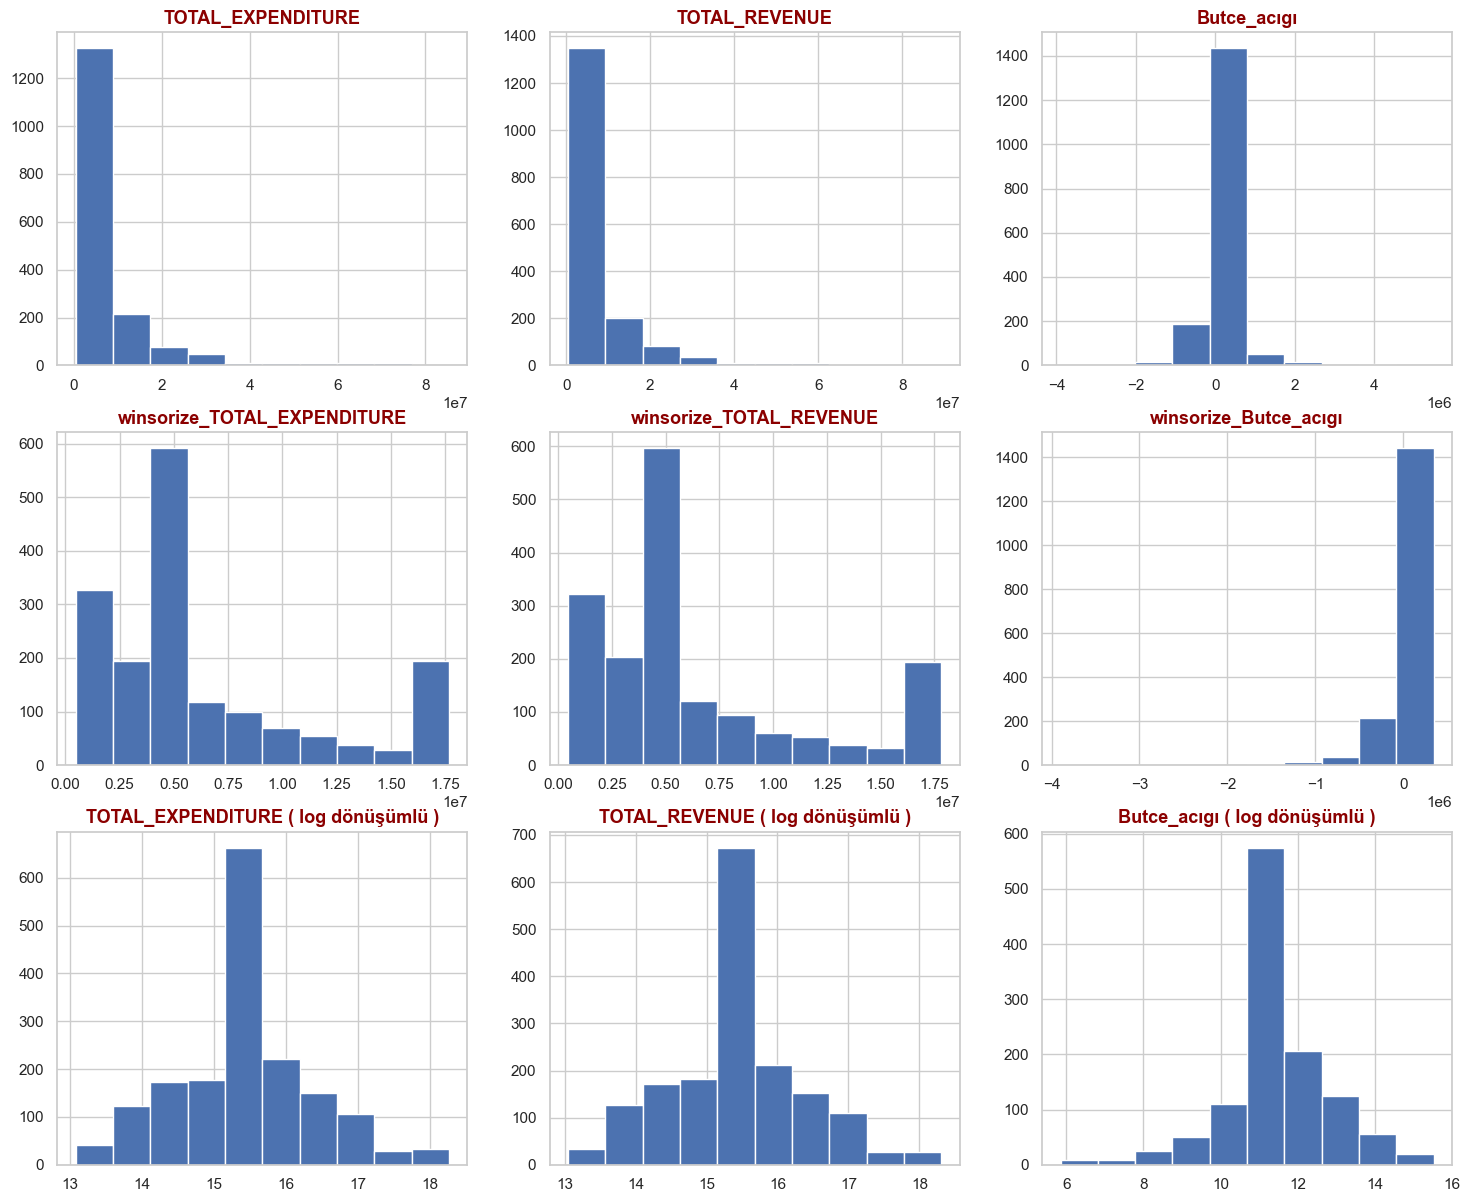

In [231]:
plt.figure(figsize=(18,15))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
degiskenler = ["TOTAL_EXPENDITURE","TOTAL_REVENUE","Butce_acıgı"]
winsorize_degiskenler = ["winsorize_TOTAL_EXPENDITURE","winsorize_TOTAL_REVENUE","winsorize_Butce_acıgı"]

for i in range (3):
    plt.subplot(3,3,i+1)
    plt.hist(data[degiskenler[i]])
    plt.title(degiskenler[i], fontdict = baslik_font)
    
    plt.subplot(3,3,i+4)
    plt.hist(data[winsorize_degiskenler[i]])
    plt.title(winsorize_degiskenler[i], fontdict = baslik_font)
    
    plt.subplot(3,3,i+7)
    plt.hist(np.log(data[degiskenler[i]]))
    plt.title(degiskenler[i] +" ( log dönüşümlü )", fontdict = baslik_font)


Üstte yer alna tablolar incelendiğinde kesinlikle normal dağılımı en uygun yöntem verilerin logaritmasının alınmasıdır. 

## KATAGORİK DEĞERLERİN GÖRSELLEŞTİRİLMESİ

In [232]:
data.groupby("STATE")["Butce_acıgı"].sum().index

Index(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO',
       'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA', 'DODEA', 'FLORIDA',
       'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS',
       'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS',
       'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA',
       'NATIONAL', 'NEBRASKA', 'NEVADA', 'NEW_HAMPSHIRE', 'NEW_JERSEY',
       'NEW_MEXICO', 'NEW_YORK', 'NORTH_CAROLINA', 'NORTH_DAKOTA', 'OHIO',
       'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'RHODE_ISLAND', 'SOUTH_CAROLINA',
       'SOUTH_DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA',
       'WASHINGTON', 'WEST_VIRGINIA', 'WISCONSIN', 'WYOMING'],
      dtype='object', name='STATE')

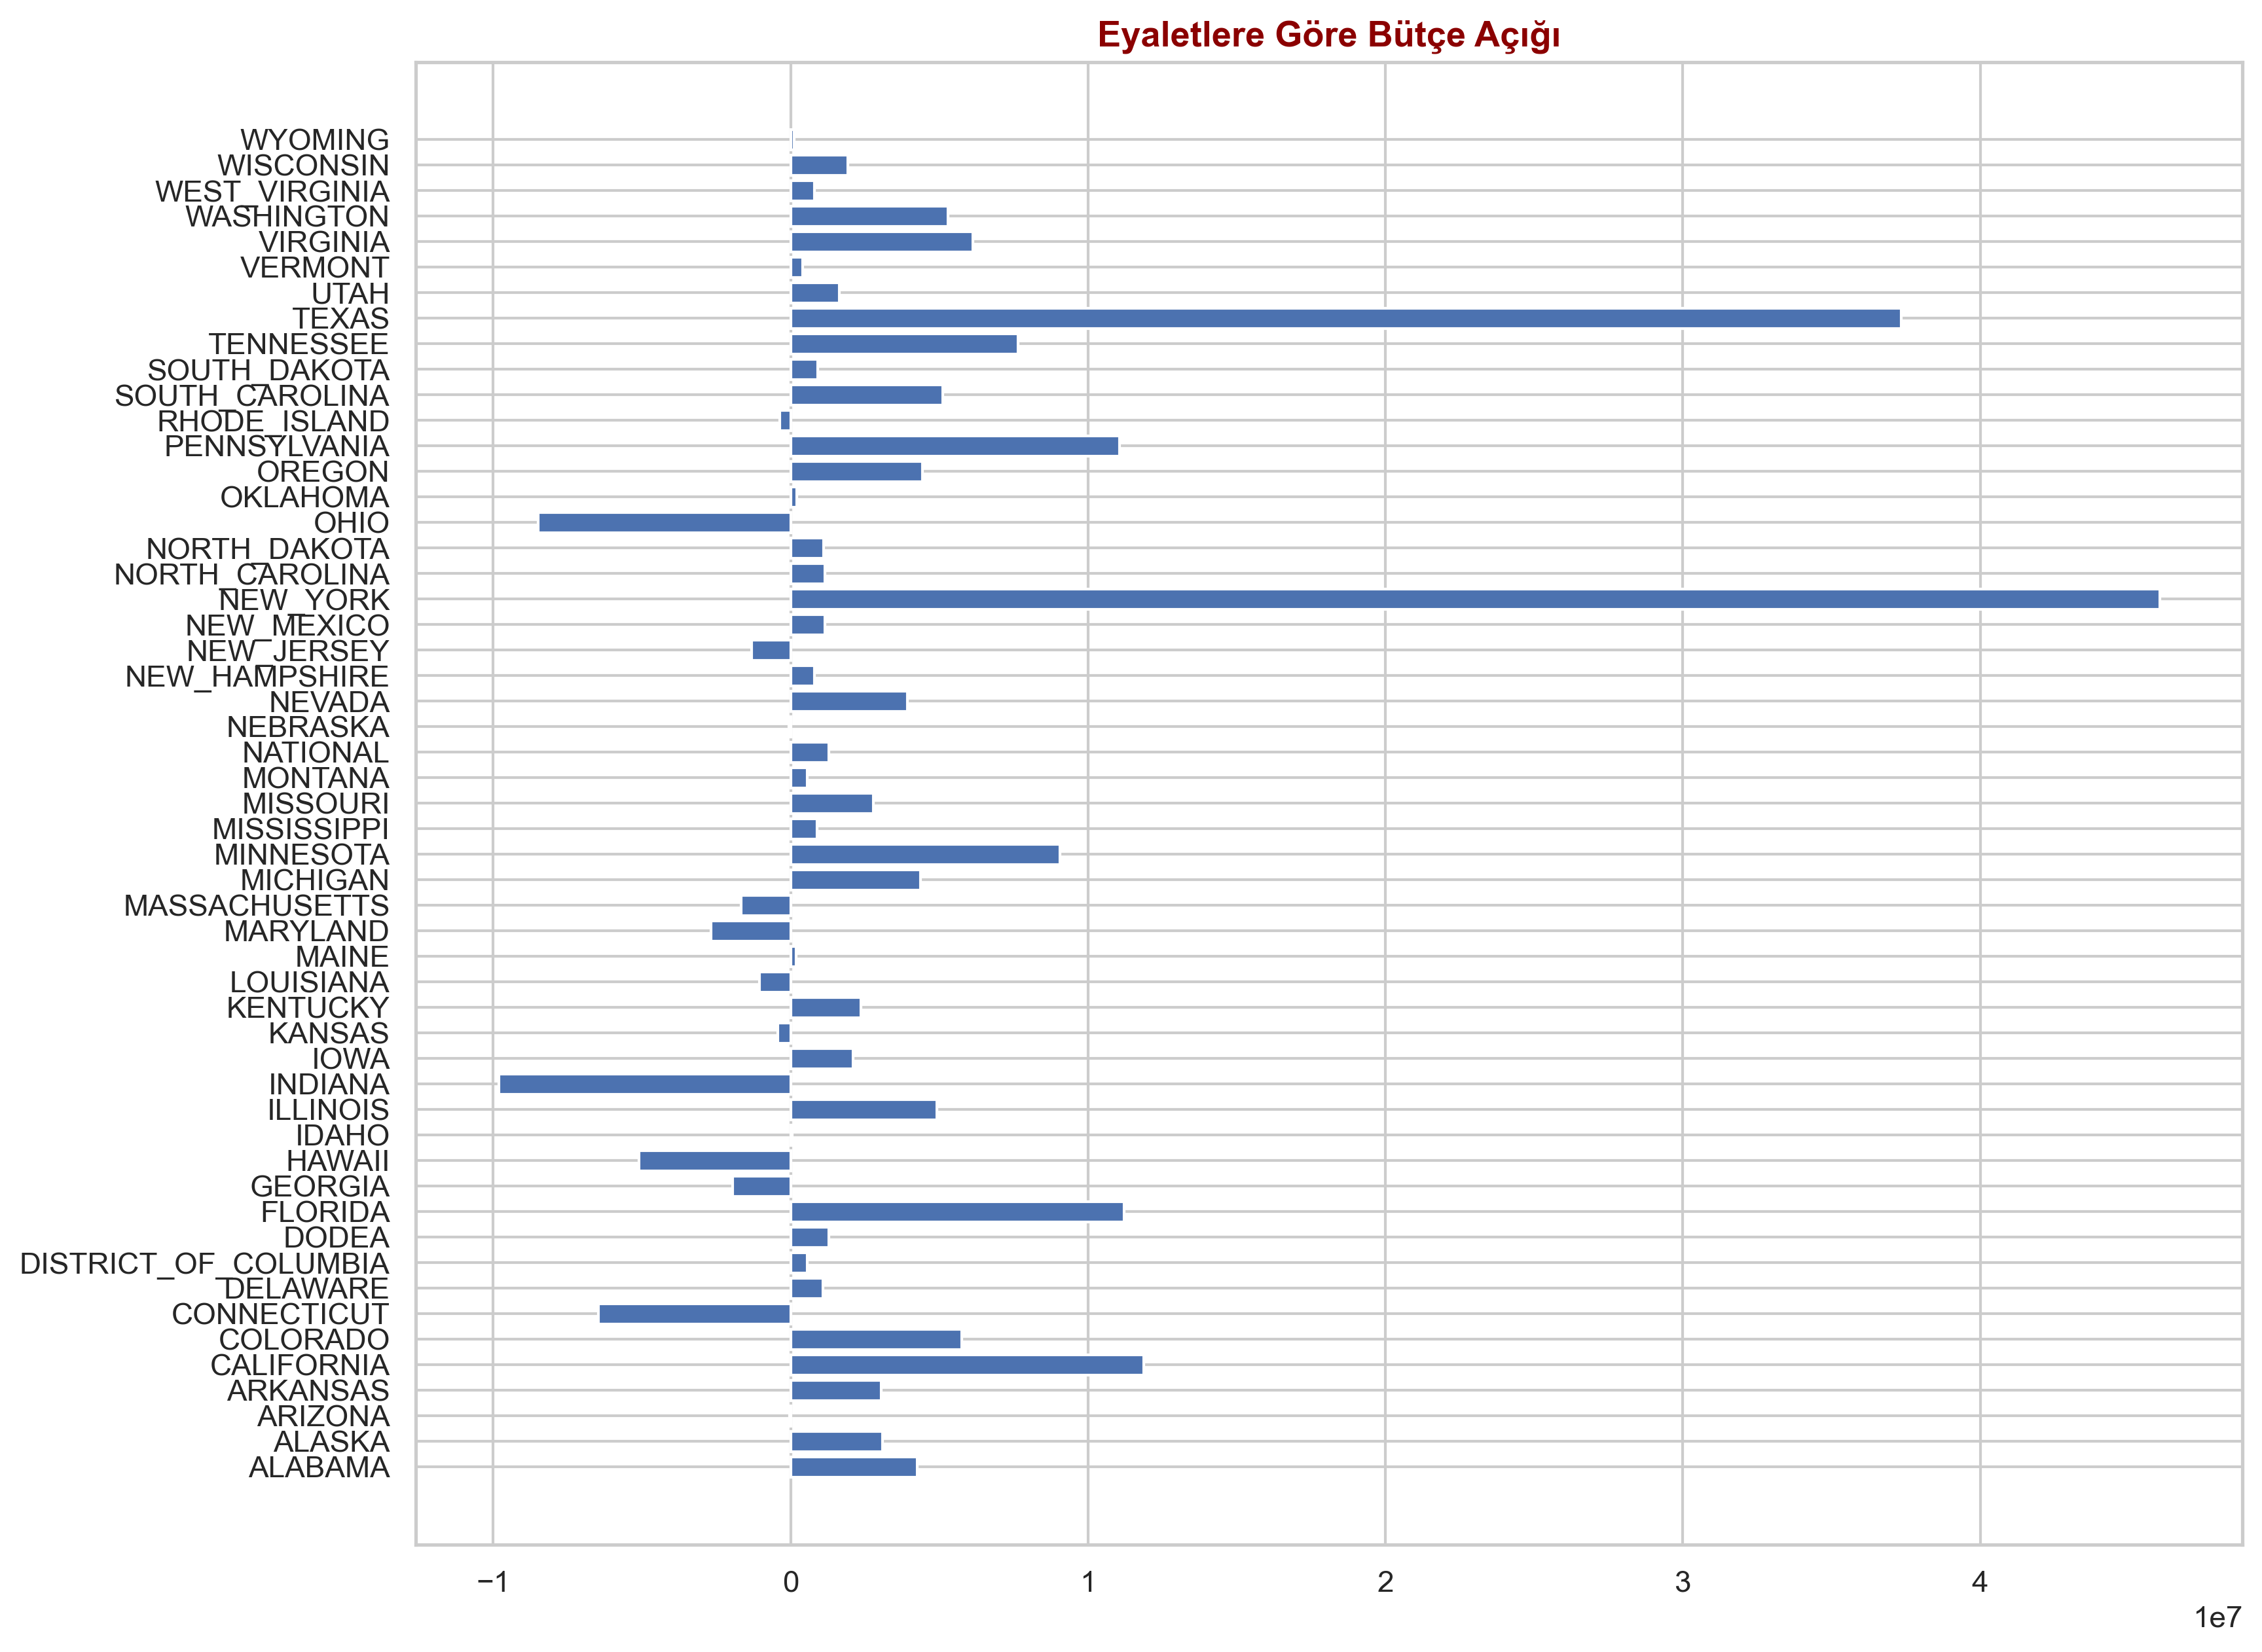

In [233]:
plt.figure(figsize=(12,10), dpi=300)
plt.barh(data.groupby("STATE")["Butce_acıgı"].sum().index, 
        data.groupby("STATE")["Butce_acıgı"].sum(),)
plt.title("Eyaletlere Göre Bütçe Açığı", fontdict=baslik_font)

plt.show()

In [234]:
a = data.groupby("STATE")["Butce_acıgı"].sum()
liste_values = []
for i in range(len(a)):
    liste_values.append(a.values[i])
    
liste_items = []
for i in range(len(a)):
    liste_items.append(a.index[i])

data2 = pd.DataFrame({"values" : liste_values, "items" : liste_items})
new_index = (data2["values"].sort_values(ascending=False)).index.values
sorted_data = data2.reindex(new_index)

sorted_data


,values,items
34,4.603506e+07,NEW_YORK
45,3.733747e+07,TEXAS
4,1.186291e+07,CALIFORNIA
10,1.120846e+07,FLORIDA
40,1.105009e+07,PENNSYLVANIA
24,9.063159e+06,MINNESOTA
44,7.649695e+06,TENNESSEE
48,6.123567e+06,VIRGINIA
5,5.763024e+06,COLORADO
49,5.295256e+06,WASHINGTON


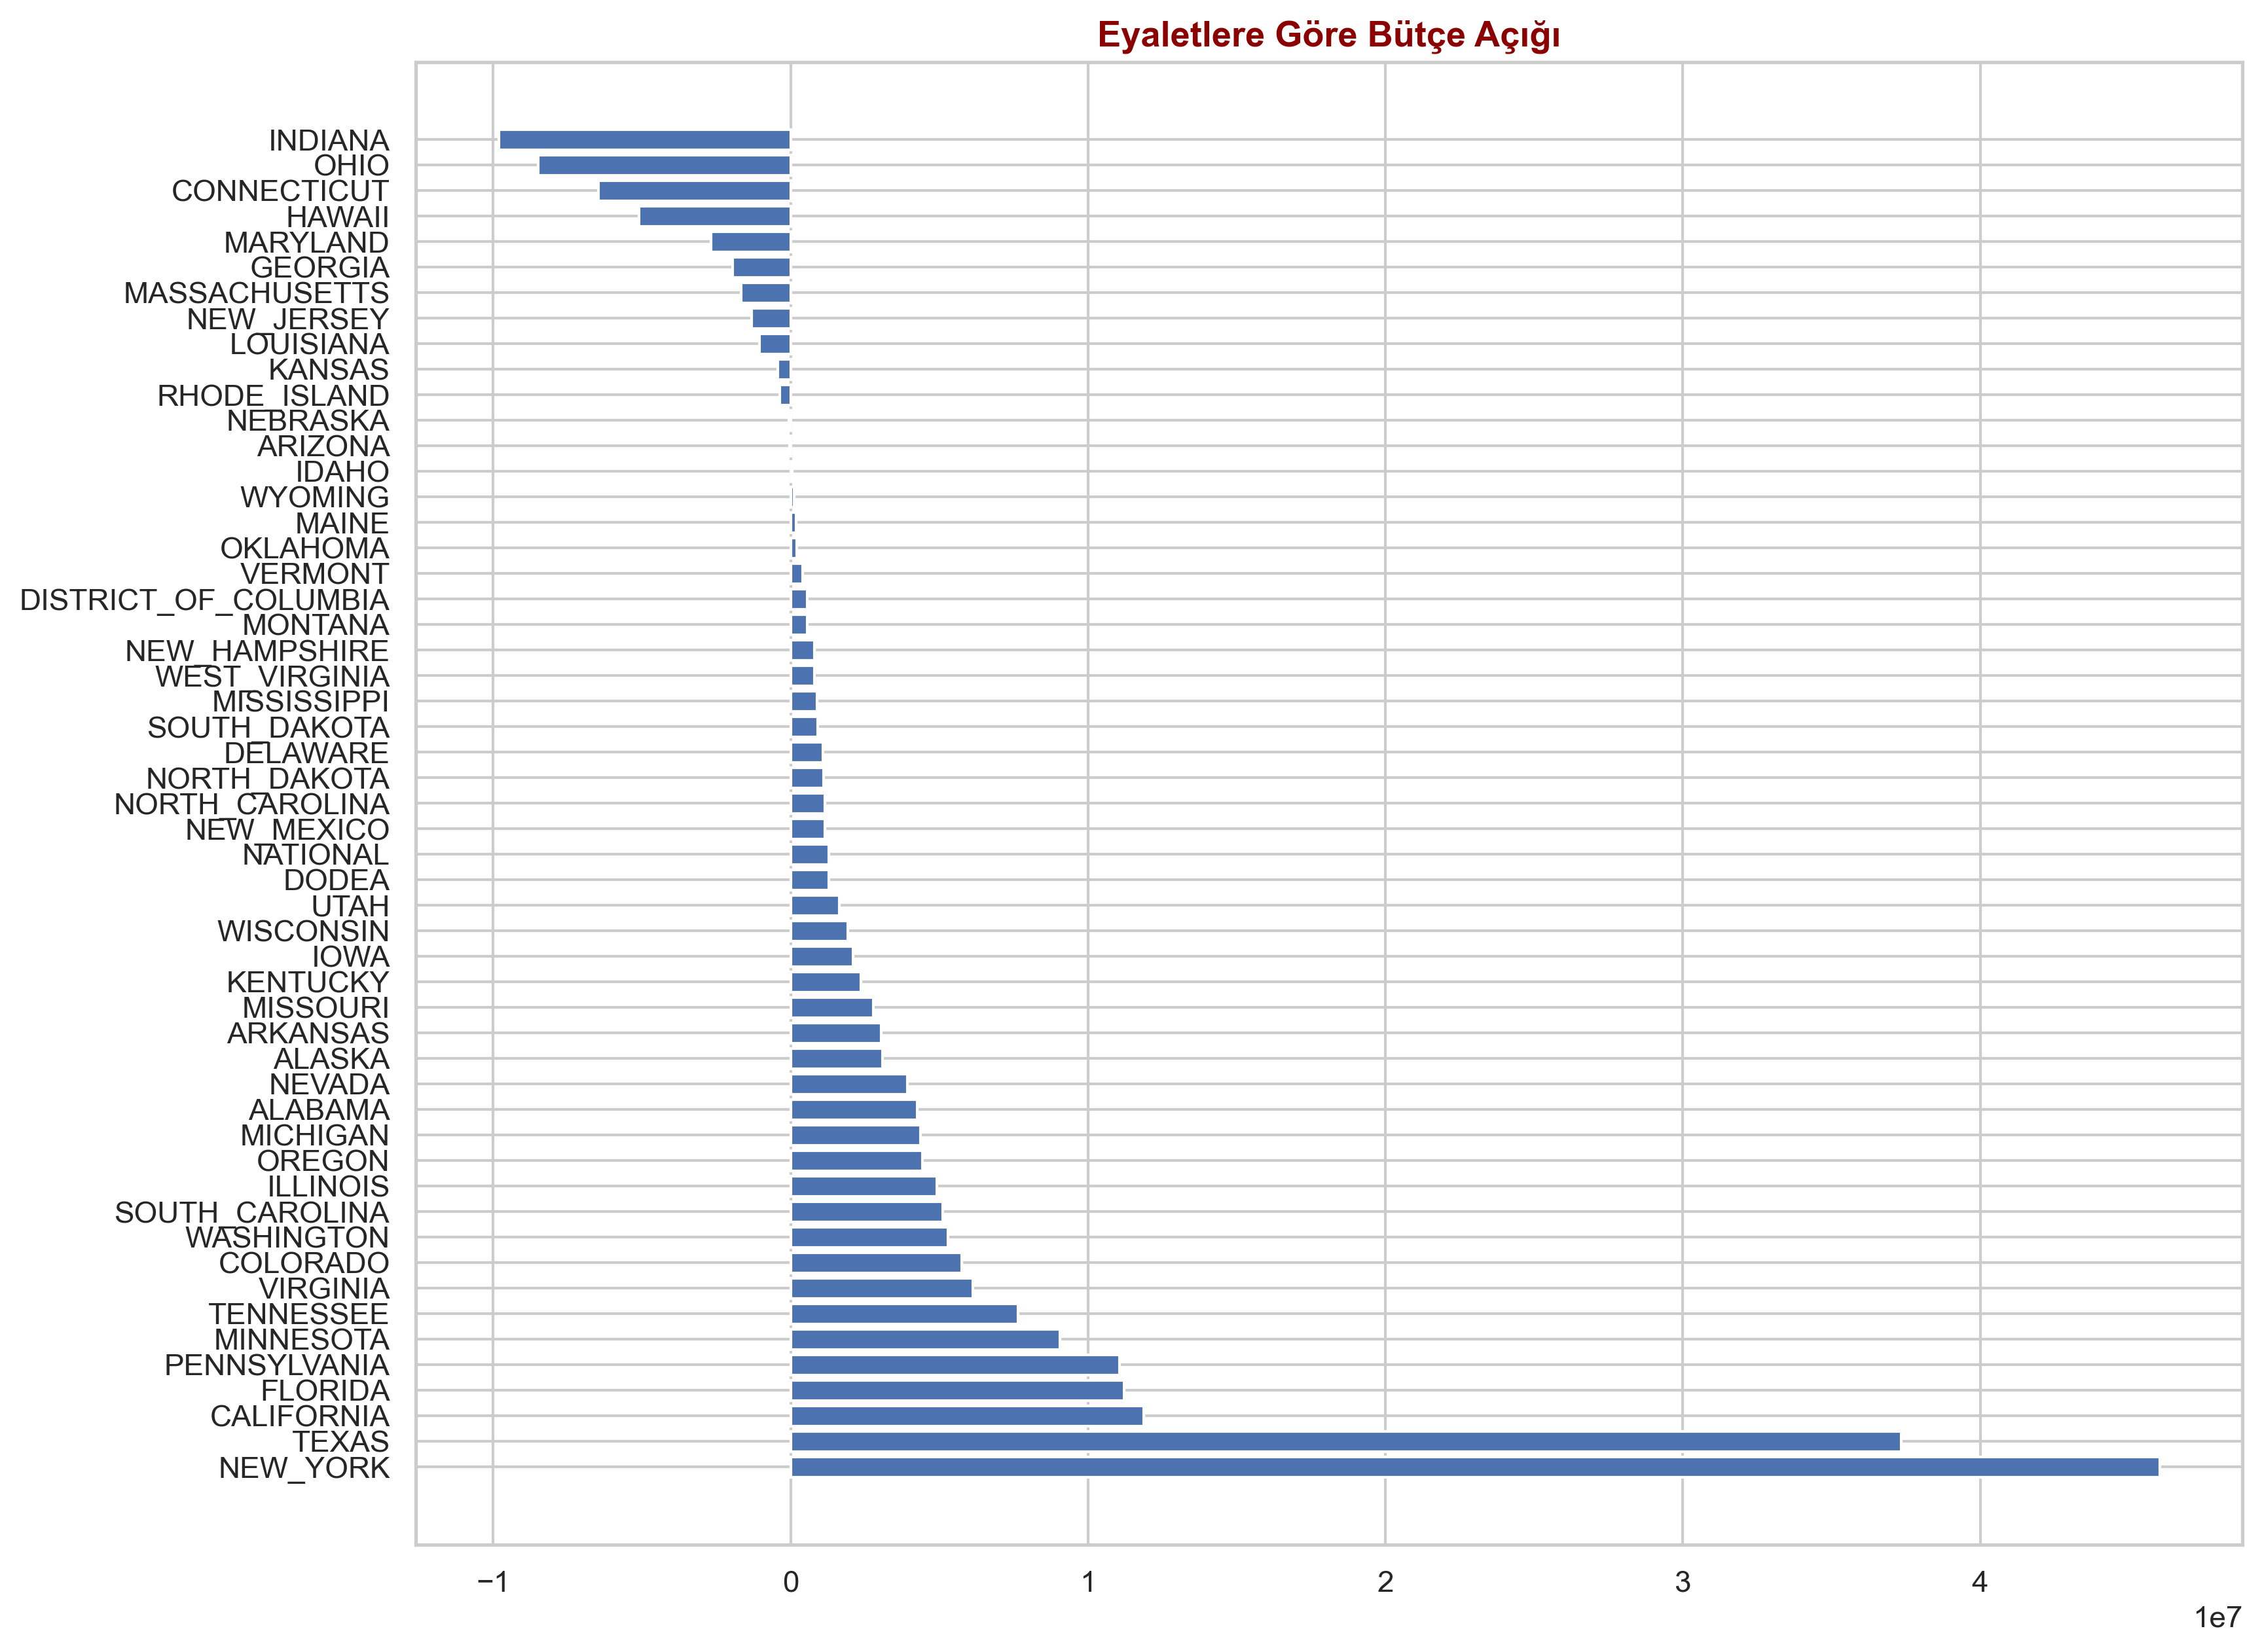

In [235]:
plt.figure(figsize=(12,10), dpi=300)
plt.barh(sorted_data["items"],
         sorted_data["values"])
plt.title("Eyaletlere Göre Bütçe Açığı", fontdict=baslik_font)

plt.show()

## WASHINGTAN EYALETİNİN YILLARA GÖRE TOPLAM HARCAMALARI (TOTAL_EXPENDITURE)

In [236]:
data.head(20)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS,Butce_acıgı,winsorize_TOTAL_EXPENDITURE,winsorize_TOTAL_REVENUE,winsorize_Butce_acıgı
0,1992_ALABAMA,ALABAMA,1992,802054.333333,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,248.307692,260.461538,249.0,266.0,268.5,286.3,-25087.0,2653798.0,2678885.0,-25087.0
1,1992_ALASKA,ALASKA,1992,802054.333333,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,248.307692,260.461538,249.0,266.0,268.5,286.3,-77103.0,972488.0,1049591.0,-77103.0
2,1992_ARIZONA,ARIZONA,1992,802054.333333,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,248.307692,260.461538,249.0,266.0,268.5,286.3,143501.0,3401580.0,3258079.0,143501.0
3,1992_ARKANSAS,ARKANSAS,1992,802054.333333,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,248.307692,260.461538,249.0,266.0,268.5,286.3,31063.0,1743022.0,1711959.0,31063.0
4,1992_CALIFORNIA,CALIFORNIA,1992,802054.333333,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,248.307692,260.461538,249.0,266.0,268.5,286.3,878807.0,17668352.0,17821620.0,344506.0
5,1992_COLORADO,COLORADO,1992,802054.333333,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,248.307692,260.461538,249.0,266.0,268.5,286.3,79653.0,3264826.0,3185173.0,79653.0
6,1992_CONNECTICUT,CONNECTICUT,1992,802054.333333,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,248.307692,260.461538,249.0,266.0,268.5,286.3,-112964.0,3721338.0,3834302.0,-112964.0
7,1992_DELAWARE,DELAWARE,1992,802054.333333,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,248.307692,260.461538,249.0,266.0,268.5,286.3,-6449.0,638784.0,645233.0,-6449.0
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,802054.333333,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,248.307692,260.461538,249.0,266.0,268.5,286.3,33413.0,742893.0,709480.0,33413.0
9,1992_FLORIDA,FLORIDA,1992,802054.333333,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,248.307692,260.461538,249.0,266.0,268.5,286.3,-200657.0,11305642.0,11506299.0,-200657.0


In [241]:
dataY_E = pd.DataFrame(columns = ["YEAR", "TOTAL_EXPENDITURE"])
list_year = []
list_TOTAL_EXPENDITURE =[]

for i in range(len(data)):
    if data["STATE"][i] == "CALIFORNIA":
        list_year.append(data["YEAR"][i])
        list_TOTAL_EXPENDITURE.append(data["TOTAL_EXPENDITURE"][i])
               
dataY_E["YEAR"] = list_year
dataY_E["TOTAL_EXPENDITURE"] = list_TOTAL_EXPENDITURE



In [242]:
#Sıralama
new_index = (dataY_E["YEAR"].sort_values(ascending = True)).index.values
sorted_data2 = dataY_E.reindex(new_index)


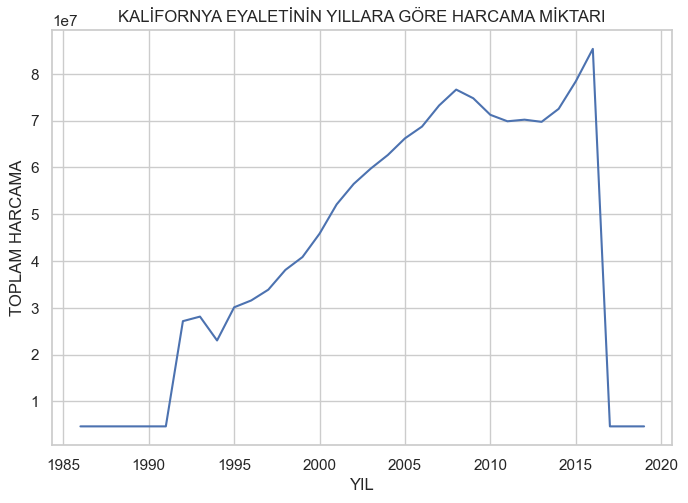

In [273]:
plt.plot(sorted_data2.YEAR, sorted_data2.TOTAL_EXPENDITURE)
plt.xlabel("YIL")
plt.ylabel("TOPLAM HARCAMA")
plt.title("KALİFORNYA EYALETİNİN YILLARA GÖRE HARCAMA MİKTARI")
plt.show()

In [306]:
def başarı_ort (columname1,columname2,variable):
    basarı_reading =pd.DataFrame( columns = [columname1, columname2])
    toplam_reading = data.groupby("STATE")[variable].sum()
    yılsayısı = len(list(data["YEAR"].unique()))
    for i in range(len(toplam_reading)):
        STATE = toplam_reading.index[i]
        BAŞARI = toplam_reading.values[i]/yılsayısı
    
        basarı_reading = basarı_reading.append({columname1 : STATE, columname2 : BAŞARI},ignore_index=True )
    return (basarı_reading)
başarı_ort("STATE","BAŞARI","G08_HP_A_READING")

,STATE,BAŞARI
0,ALABAMA,249.000000
1,ALASKA,248.272727
2,ARIZONA,249.000000
3,ARKANSAS,249.000000
4,CALIFORNIA,249.000000
5,COLORADO,249.000000
6,CONNECTICUT,249.000000
7,DELAWARE,249.000000
8,DISTRICT_OF_COLUMBIA,249.000000
9,DODEA,120.727273


In [307]:
başarı_ort("STATE","BAŞARI","G08_AM_A_MATHEMATICS")
    

,STATE,BAŞARI
0,ALABAMA,260.461538
1,ALASKA,259.724942
2,ARIZONA,260.209790
3,ARKANSAS,260.461538
4,CALIFORNIA,260.461538
5,COLORADO,260.461538
6,CONNECTICUT,260.461538
7,DELAWARE,260.461538
8,DISTRICT_OF_COLUMBIA,260.461538
9,DODEA,126.284382


Yukarıda ki tabloya baktığımızda CALIFORNIA eyaleti için matematik başarısı reading den daha fazla

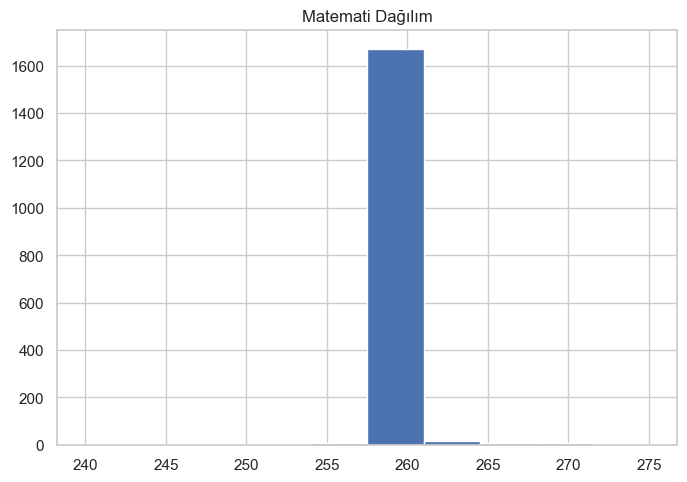

In [310]:
plt.hist(data.G08_AM_A_MATHEMATICS)
plt.title("Matemati Dağılım")
plt.show()


# KAYIP DEĞERLERİ DOLDURMAK

In [311]:
dataNAN = pd.read_csv("/Users/aytackolukisa/Desktop/Jupiter_Dosyaları/states_all_extended.csv")

In [313]:
dataNAN.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Ortalama İle Doldurma

In [331]:
def ortalama_doldur (column) :
    dataNAN[column].fillna(dataNAN[column].mean(), inplace = True)

In [332]:
dataNAN.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.082759
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.082759
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.082759
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.082759
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.082759


In [333]:
def find_to_str(column1):
        print("{} sütunu için problemli değerler : ".format(column1))
        for deger in dataNAN[column1]:
            try:
                float(deger)
            except:
                print(deger)

In [327]:
find_to_str("G08_TR_A_MATHEMATICS")

G08_TR_A_MATHEMATICS sütunu için problemli değerler : 


### Medyan İle Doldurma

In [334]:
dataNAN2 = pd.read_csv("/Users/aytackolukisa/Desktop/Jupiter_Dosyaları/states_all_extended.csv")

In [345]:
def medyan_doldur(column):
    
    dataNAN2[column].fillna(np.percentile(dataNAN2[column], 50), inplace = True)
    
    

In [348]:
a=np.percentile(dataNAN2["G08_TR_A_MATHEMATICS"], 50)
a

5.0

In [349]:
medyan_doldur("G08_TR_A_MATHEMATICS")
dataNAN2

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,247.0,278.0,286.0,315.0,NaN,NaN,NaN,NaN,269.0,293.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,248.0,267.0,285.0,315.0,237.0,259.0,NaN,NaN,263.0,292.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.0,5.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,251.0,273.0,277.0,294.0,253.0,267.0,NaN,NaN,268.0,276.0


### Enterpolasyon İle Doldurma

In [350]:
dataNAN3 = pd.read_csv("/Users/aytackolukisa/Desktop/Jupiter_Dosyaları/states_all_extended.csv")

In [356]:
def ent_doldurma (column):
    for i in range(1,len(dataNAN3)):
        if pd.isnull(dataNAN3[column][i]):
            try:
                dataNAN3[column][i] = (dataNAN3[column][i-1]+dataNAN3[column][i+1])/2
            except:
                pass
            

In [358]:
ent_doldurma("G08_TR_A_MATHEMATICS")
dataNAN3

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,247.0,278.0,286.0,315.0,NaN,NaN,NaN,NaN,269.0,293.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,248.0,267.0,285.0,315.0,237.0,259.0,NaN,NaN,263.0,292.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.0,284.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,251.0,273.0,277.0,294.0,253.0,267.0,NaN,NaN,268.0,276.0


Şimdi üç farklı şekilde doldurduğumuz "G08_TR_A_MATHEMATICS" değişkeninin dağılımını inceleyelim

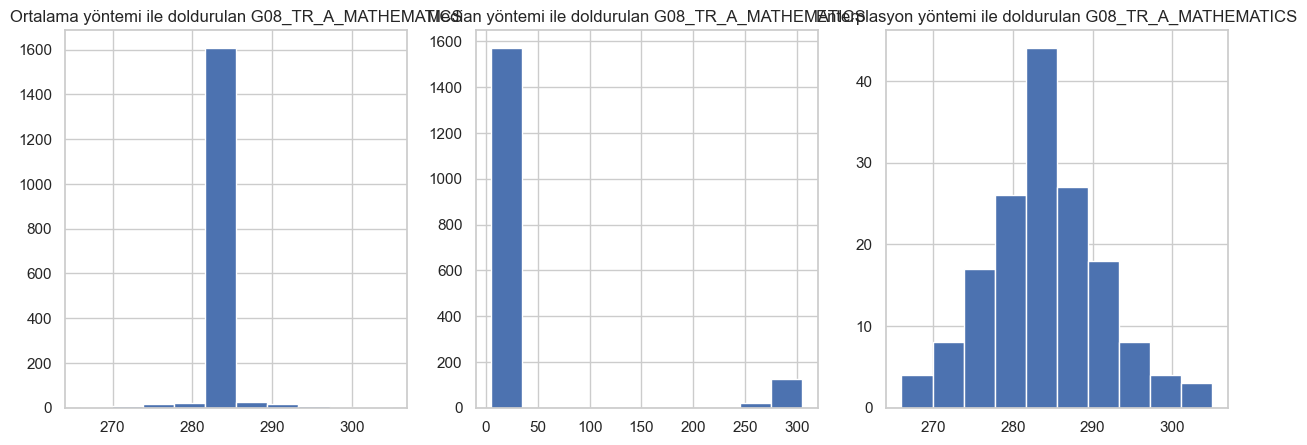

In [362]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.hist(dataNAN["G08_TR_A_MATHEMATICS"])
plt.title("Ortalama yöntemi ile doldurulan G08_TR_A_MATHEMATICS")

plt.subplot(1,3,2)
plt.hist(dataNAN2["G08_TR_A_MATHEMATICS"])
plt.title("Median yöntemi ile doldurulan G08_TR_A_MATHEMATICS")

plt.subplot(1,3,3)
plt.hist(dataNAN3["G08_TR_A_MATHEMATICS"])
plt.title("Enterplasyon yöntemi ile doldurulan G08_TR_A_MATHEMATICS")
plt.show()

Yukarıda ki grafik dağılımını incelediğimizde istatistik olarak en uygun doldurma yöntemi enterpalasyon olduğunu gözlemliyoruz.